# Machine Learning By Example

The first thing we want to do is import the basic Python packages such as _NumPy_, _Matplotlib_ and _Pandas_.

In [1]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Configuration

Configure the data file that will used in this interactive tutorial. For now, this tutorial expects a CSV file but can easily be up dated to accomodate other data sources and file formats.

In [2]:
data_file    = 'cardiacData.csv'
data_columns = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ]
data_header  = -1
# data_file    = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
# data_columns = [ 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class' ]
# data_header  = None

# Import Data

Here we import the data into a Pandas _Data Frame_ which will be used to process going forward.

In [3]:
file_data = pd.read_csv(data_file, header = data_header, names = data_columns)
# file_data.iloc[:, [0, 1, 2, 3, 4]].values
df = pd.DataFrame(file_data)

# Understanding The Data

## File Metadata

Looking at the data types int he file will help us understand the file format. If we notice a column or _Feature_, that we want to include in our data set that is non-numeric, for example, we will want to convert that to a numeric data type when we begin _Feature Engineering_ (pre-processing our data).

In [4]:
df.dtypes

HR         int64
Att        int64
STE        int64
Age        int64
Outcome    int64
dtype: object

## Data Sample

In [5]:
pd.set_option('display.max_rows', 5)
df

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
...,...,...,...,...,...
248,71,0,68,0,0
249,73,0,49,1,0


## Describing the Data

Describing the data will show any values that have a range outside of the normal distribution. These can be standardized using a _ZScore_ for example.

In [6]:
# Reset max_rows to all rows
pd.set_option('display.max_rows', None)
df.describe()

,HR,Att,STE,Age,Outcome
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,70.008000,0.104000,65.548000,0.360000,0.332000
std,14.472795,0.305873,14.091486,0.513278,0.471876
min,26.000000,0.000000,23.000000,0.000000,0.000000
25%,61.000000,0.000000,55.250000,0.000000,0.000000
50%,70.000000,0.000000,67.000000,0.000000,0.000000
75%,78.000000,0.000000,76.000000,1.000000,1.000000
max,110.000000,1.000000,99.000000,2.000000,1.000000


# Visualizing the Data

Visualizing the data is key to helping understand the makeup of the data and it's attributes (Feature Vectors). This helps to find ways to tune the model as well as outliers or data that may need standardized.

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each _feature_ is to look at histograms.

Histograms represent the distribution of a continuous variable (_feature_ in this case) over a given interval or period of time. Histograms plot the data by dividing it into intervals called _bins_. It is used to inspect the underlying frequency distribution or shape of the data Gaussian (eg. Normal distribution), outliers, skewness, etc. 

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

**_TIP_**: Guassian distributions are good to work with since data tends to cluster at a given point.

**Choosing a Bin Number**

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data.

_Matplotlib_ will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

**_TIP_**: If you have a small amount of data, use wider bins to eliminate noise. If you have a lot of data, use narrower bins because the histogram will not be that noisy.

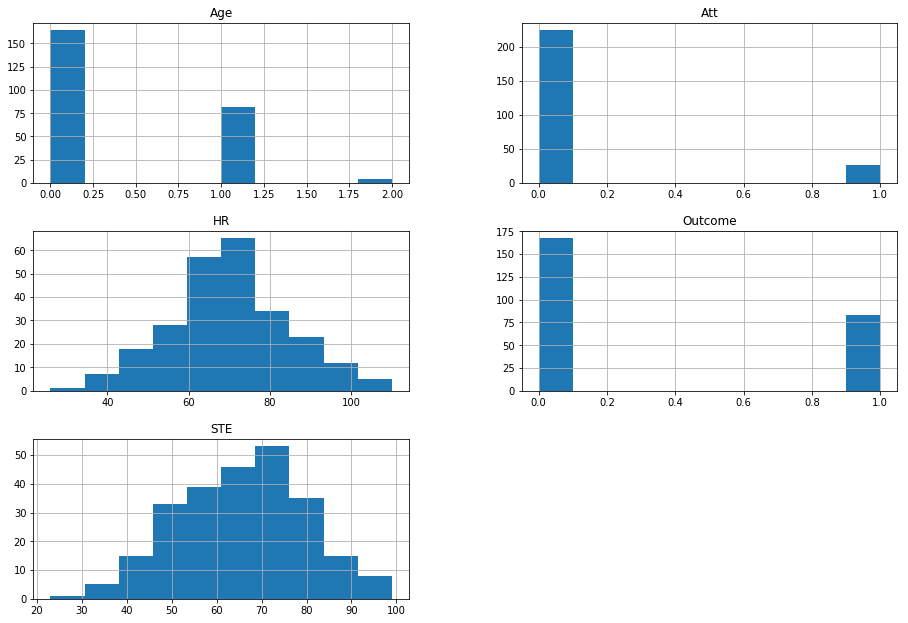

In [7]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
# example data
df.hist(histtype = 'bar', bins = 10)
plt.subplots_adjust(left = 3, bottom = 10, right = 5, top = 12, wspace = None, hspace = None)
plt.show()

## Density Plots

Histograms are a great way to start exploring a single _feature_ drawn from one category. However, when we want to compare the distributions of one _feature_ across multiple categories, histograms have issues with readability.

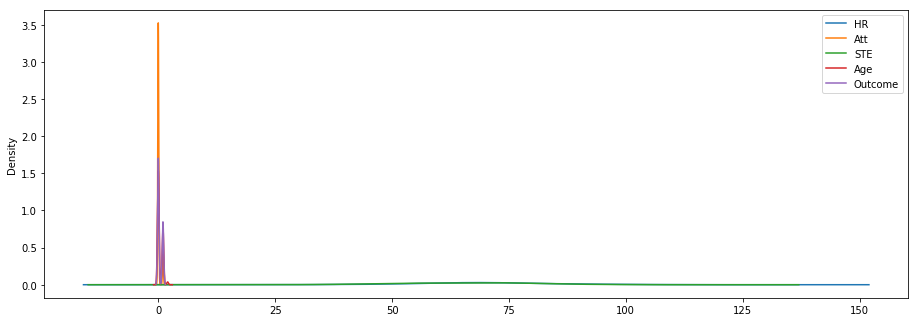

In [27]:
df.plot.density()
plt.subplots_adjust(left = 3, bottom = 4, right = 5, top = 5, wspace = None, hspace = None)
plt.show()

## Scatter Plot

In [ ]:
df.plot.scatter(x='STE', y='HR')
plt.show()

## Box-And-Whisker Plot

In [ ]:
df.plot(kind = 'box')
plt.show()

## Scatter Matrix

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.subplots_adjust(left = 3, bottom = 10, right = 5, top = 12, wspace = None, hspace = None)
plt.show()

# Feature Engineering

# Find K

## Elbow Method (Sum of Squared Errors)

In [ ]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
samples = 10

# Try different values for k and record the results.
for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(file_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
# Average Within Cluster Distances to Centroid
# or Within Cluster Sum of Squares
plt.ylabel('WCSS')
plt.show()